In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

suv_data=pd.read_csv("E:\\MyCodes\\SUV\\suv_data.csv")
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
len(suv_data.index)

400

<AxesSubplot:xlabel='Purchased', ylabel='count'>

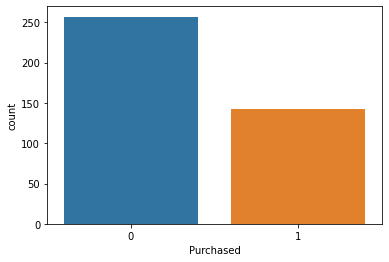

In [3]:
sns.countplot(x="Purchased",data=suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

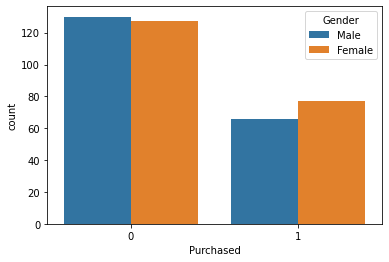

In [4]:
sns.countplot(x="Purchased",hue='Gender',data=suv_data)

<AxesSubplot:ylabel='Frequency'>

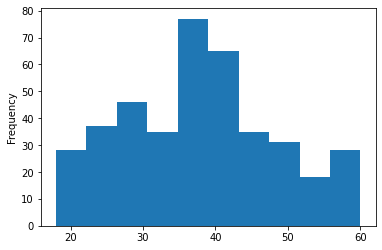

In [5]:
suv_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

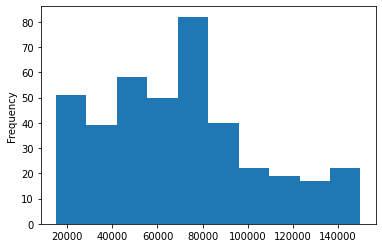

In [6]:
suv_data['EstimatedSalary'].plot.hist()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='count'>

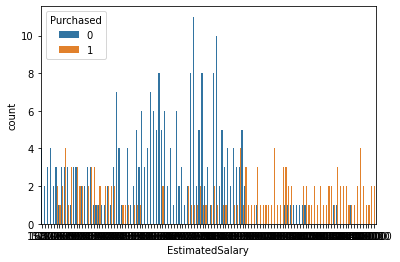

In [7]:
sns.countplot(x="EstimatedSalary",hue='Purchased',data=suv_data)

In [8]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
suv_data=suv_data.drop(columns='User ID')

In [11]:
gender=pd.get_dummies(suv_data['Gender'],drop_first=True)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [12]:
suv_data=pd.concat([suv_data,gender],axis=1)
suv_data=suv_data.drop(columns='Gender')
suv_data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
x=suv_data.drop(columns='Purchased')
y=suv_data['Purchased']

In [14]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression(random_state=0)

In [29]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [30]:
predictions=lr.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [32]:
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

0.9125
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

